### Red-Black tree

A Red-Black tree is a self-balancing binary search tree. The main difference to
a normal binary tree is an extra bit that stores the parity  (the _color_) of
each node. This bit can be either be 0 (_black_) or 1 (_red_). An example of a
red-black tree is shown in Figure 1 (Hardcoded) 

![rb-tree.png](attachment:rb-tree.png "A red-black tree")

The following invariant must be satisfied every time an operation is
being made on node of a Red-Black tree:

1. Every node is either red or black
2. The root is always black
3. Every leaf is black
4. If a node is red, then both its children are black
5. All paths from a node to descendant nodes contain the same number of 
black nodes

The node of a Red-Black tree can be described by the following data type:
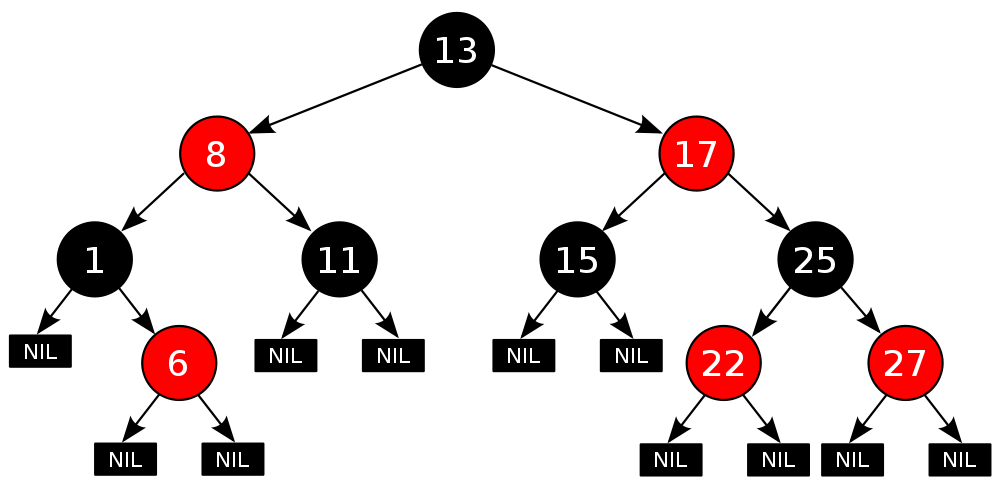

In [ ]:
from enum import Enum

class RBNode:
    
    def __init__(self, color, key, left, right, parent):
        self.left = left
        self.right = right
        self.parent = parent
        self.key = key
        self.color = color

    def __str__(self):
        return str("(%s)%s" % (self.color, self.key))
    
class NodeColors(Enum):
    BLACK = 0;
    RED = 1;

The data structure of the tree is nothing more than a collection of nodes with
the root node as the starting point. The constructor initializes a root node to
a provided value

In [ ]:
class RBTree:

    def __init__(self, key):
        self.nil = RBNode(NodeColors.BLACK, None, None, None, None)
        self.root = RBNode(NodeColors.BLACK, key, self.nil, self.nil, self.nil)

Your task for this assignment is to construct algorithms that
manipulate Red-Black trees.

## Constructing a Red-Black Tree
We start constructing a Red-Black tree by calling the constructor
```
tree = RBTree(5)
```
Inserting a node consists of three steps:

1. Finding the appropriate branch to insert the node in the tree
2. Inserting the node and creating links to the tree
3. Rebalancing the tree

For Step 1, the procedure is not much different from a normal binary search
tree. Specifically, the algorithm first finds the appropriate position
for the new node by searching through the tree. In the following snippet,
`z` is the value we would like to insert. However, the snippet has a
mistake. 

```python
def search(self, tree, z):
    y = tree.nil
    x = tree.root
    while x != tree.nil:
        y = x
        if z.key < x.key:
            x = x.left
        else:
            y = x.right
    return y
```

**T1 (10 points)**: Spot and fix the mistake in the `search` method

In [ ]:
def search(tree, z):
    y = tree.nil
    x = tree.root
    while x != tree.nil:
        y = x
        if z.key < x.key:
            x = x.left
        else:
            y = x.right
    return y

Using the (hopefully correct by now!) `search` method, we can locate the node 
to insert our new node as a child. This happens by creating the node and
linking it to the appropriate super/sub nodes. Note that for new nodes,
the starting color is always `RED`.

**T2 (20 points)**: Write code to construct and link a new node.
_Hint_: Use the `search` method inside the `insert` method.
_Hint_: Make the method return the new node, this is usefull for later

In [ ]:
def insert(tree, z):
    pass

In [ ]:
#Test you implementation here

After inserting the node, the tree potentially needs to be rebalanced.
An example of why this is so can be seen in the following plot. What
we see here is that the insertion of node 4 violates invariant number 4.

![rb-invariant-violation.jpg](attachment:rb-invariant-violation.jpg "Violating Red-Black tree invariants on insert. Node 5 has a red node as child.")

The rebalancing operation can be quite complicated; the pseudocode below
takes care of all the cases.

```
proceduce rb_balance(T, z)
'' T is an RBTree
'' z is the newly inserted node

while z.parent.color == RED
    if z.parent == z.parent.parent.left
        y <- z.parent.parent.right
  
        if y.color == RED
            z.parent.color <- BLACK
            y.color <- BLACK
            z.parent.parent.color <- RED
            z <- z.parent.parent
        else 
            if z == z.parent.right
                z <- z.parent
                left_rotate(T, z)
            z.parent.color <- BLACK
            z.parent.parent.color <- RED
            right_rotate(T, z.parent.parent)
    else
      y <- z.parent.parent.left
       if y.color == RED
            z.parent.color <- BLACK
            y.color <- BLACK
            z.parent.parent.color <- RED
            z <- z.parent.parent
        else 
            if z == z.parent.left
                z <- z.parent
                right_rotate(T, z)
            z.parent.color <- BLACK
            z.parent.parent.color <- RED
            left_rotate(T, z.parent.parent)
T.root.color <- BLACK    
```

You might be wondering with `left_rotate` and `right_rotate` are. They are
functions that represent common operations on trees. To understand how they work
have a look at the plot below.

![rb-tree-rotation.png](attachment:rb-tree-rotation.png "Left and right rotation.")

Below you can find the Python code for the left_rotate method.

In [ ]:
def left_rotate(tree, x):
    y = x.right
    x.right = y.left

    if y.left != tree.nil:
        y.left.parent = x
    y.parent = x.parent
    
    if x.parent == tree.nil:
        tree.root = y
    elif x == x.parent.left:
        x.parent.left = y
    else:
        x.parent.right = y
    y.left = x
    x.parent = y

**T3 (20 points)**: Implement the code for `right_rotate`

In [ ]:
def right_rotate(tree, x):
    pass

In [ ]:
#Test your implementation here

**T4 (25 points)**: Implement the rebalancing pseudocode in Python

In [ ]:
def balance(tree, z):
    pass

In [ ]:
#Test you implemention here

## Validating the Red-Black tree invariants

**T5 (25 points)**: Create a method that will
exhaustively search whether the five invariants described above are maintained in the tree.

In [ ]:
def check():
    "@return: True, only if tree satisfies all the Red-Black tree invariants"

In [ ]:
#Test all of the five invariants here

## Proving performance properties

**T6 (10 points)**: Prove that the average and worse case complexity for the
insertion in Red-Black trees is $O(log(n))$.

## References

1. A Red-Black tree [in Java](http://algs4.cs.princeton.edu/33balanced/RedBlackBST.java.html)
2. A Red-Black tree [in C](https://www.cs.auckland.ac.nz/software/AlgAnim/red_black.html)
3. Wikipedia on [Red-Black Trees](https://en.wikipedia.org/wiki/Redâ€“black_tree)